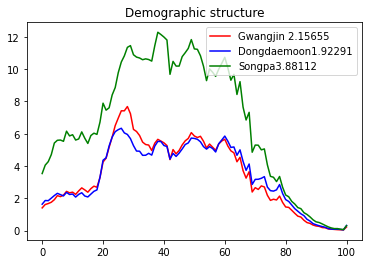

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('202012_202012_연령별인구현황_월간.csv')
data = csv.reader(f)
next(data)
x = np.arange(0,101) #x축 범위를 지정하기 위함
result1 = np.array([]) #광진구 데이터
for row in data: #광진구 데이터 불러오기
    if row[0] == '서울특별시 광진구 (1121500000)':
        for col in row[3:]:
            col = (float(col.replace(",",""))/1000)
            result1 = np.append(result1, col)

# 광진구와 비교해 각 동네별 인구 구조 차이 계산
f = open('202012_202012_연령별인구현황_월간.csv')
data = csv.reader(f)
next(data)
next(data)
resArr = np.array([])
idx = 0
sum = 0
for row in data:
    if row[0]!='서울특별시 광진구 (1121500000)':#파일에서 광진구 데이터 생략
        for col in row[3:]:
            col = (float(col.replace(",",""))/1000)
            sum += (result1[idx] - col)*(result1[idx] - col)
            idx = idx+1
        resArr = np.append(resArr, sum)
        sum = 0
        idx = 0
    
resMin = np.argmin(resArr) #가장 비슷한 동네의 인덱스 번호
resMax = np.argmax(resArr) #가장 다른 동네의 인덱스 번호

#그래프를 그리기 위해 data 읽어오기
f = open('202012_202012_연령별인구현황_월간.csv')
data = csv.reader(f)
next(data)
next(data)
count = 0
result2 = np.array([]) #제일 비슷한 동네 데이터
result3 = np.array([]) #제일 다른 동네 데이터
for row in data:
    if row[0]!='서울특별시 광진구 (1121500000)':#파일에서 광진구 데이터 생략
        if(count==resMin):
            for col in row[3:]:
                col = (float(col.replace(",",""))/1000)
                result2 = np.append(result2, col)
        if(count==resMax):
            for col in row[3:]:
                col = (float(col.replace(",",""))/1000)
                result3 = np.append(result3, col)
        count = count + 1

#표준편차와 동네명을 합침
standardDev1 = 'Gwangjin '+str(round(np.std(result1),5)) #표준편차 구하는 함수 이용
standardDev2 = 'Dongdaemoon'+str(round(np.std(result2),5))
standardDev3 = 'Songpa'+str(round(np.std(result3),5))
        
plt.title('Demographic structure')
plt.plot(x,result1, color='red', label=standardDev1)
plt.plot(result2, color='blue', label=standardDev2)
plt.plot(result3, color='green', label=standardDev3)
plt.legend()
plt.show()